### - Sobhan Moradian Daghigh
#### - 6/29/2022
### - DIP - HW04 - Q1

In [35]:
import numpy as np
import glob
import cv2
from matplotlib import pyplot as plt
from skimage.restoration import denoise_tv_chambolle

In [14]:
def load_datas(folder_name):
    images = glob.glob('{}*.png'.format(folder_name))
    datas = []
    names = []
    for image in images:
        img = cv2.imread(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        datas.append(img)
        names.append(image.split('\\')[-1][:-4])
    return datas, names

In [15]:
images, names = load_datas('./inputs/P1/')

In [16]:
names

['the_magnificent_eleven_1',
 'the_magnificent_eleven_2',
 'the_magnificent_eleven_3',
 'the_magnificent_eleven_4',
 'the_magnificent_eleven_5',
 'the_magnificent_eleven_6']

In [27]:
def plotter(images, names=None, subplots=None, gray=False):
    if subplots is None:
        plt.imshow(images, cmap='gray') if gray else plt.imshow(images)
        plt.title(names)
        plt.axis('off')
    else:
        fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(subplots[1] * 7, subplots[0] * 5))
        for i, (img, name, ax) in enumerate(zip(images, names, fig.axes)):
            ax.imshow(img, cmap='gray') if gray else ax.imshow(img)
            ax.set_title(name)
            ax.axis('off')
    plt.show()

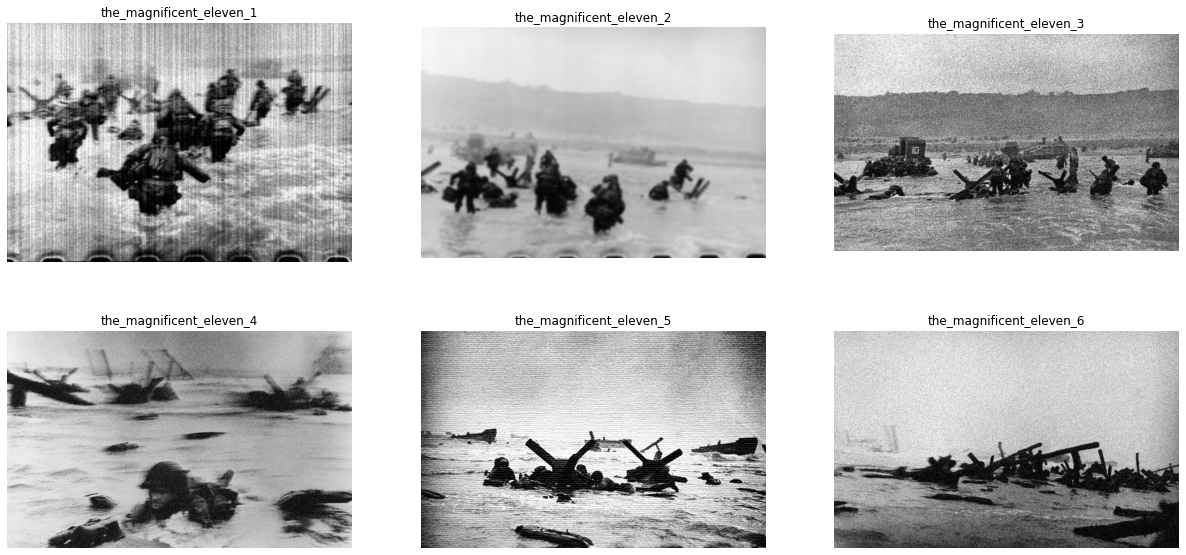

In [28]:
plotter(images, names, subplots=(2, 3))

### Image 1.

In [67]:
def fourier_transform(img):
    fft = np.fft.fft2(img)
    fft_shift = np.fft.fftshift(fft)
    magnitude_spectrum = 20 * np.log(np.abs(fft_shift))
    return magnitude_spectrum, fft_shift

In [68]:
def inverse_fourier_transform(img):
    ifft = np.fft.ifftshift(img)
    ifft = np.fft.ifft2(ifft)
    inversed = (np.abs(ifft)).astype(np.uint8)
    return inversed

In [203]:
def mouse_click(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        param[1].append([x, y])
        cv2.destroyWindow("Choose")
        param[0] = bandpass_filtering(param[0], param[1], param[2])
        select_noises(param[0], '', param[1], param[2])

In [200]:
def select_noises(img, img_name, points, size=(3, 311)):
    cv2.imshow('Choose', normalizer(img))
    cv2.setMouseCallback('Choose', mouse_click, [img, points, size])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [198]:
def bandpass_filtering(img, points, size=(3, 311)):
    for point in points:
        w_size = size[0]
        i, j = point[1], point[0]
        img[i - w_size : i + w_size, j - w_size : j + w_size + size[1]] = 0
    return img

In [81]:
def normalizer(img):
    maximum = img.max()
    minimum = img.min()
    return ((img - minimum) / (maximum - minimum) * 255).astype(np.uint8)

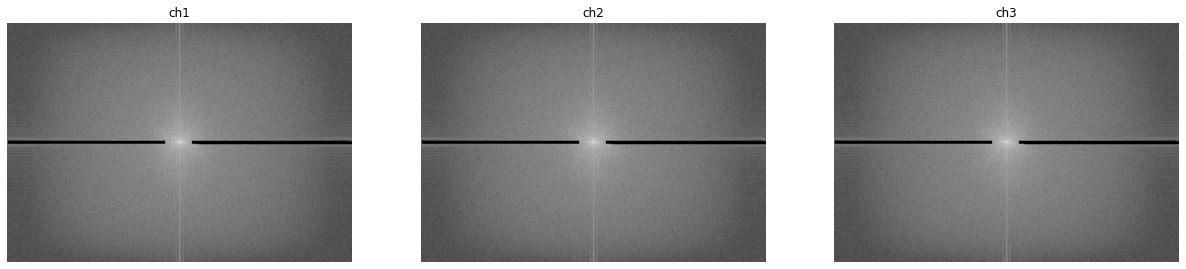

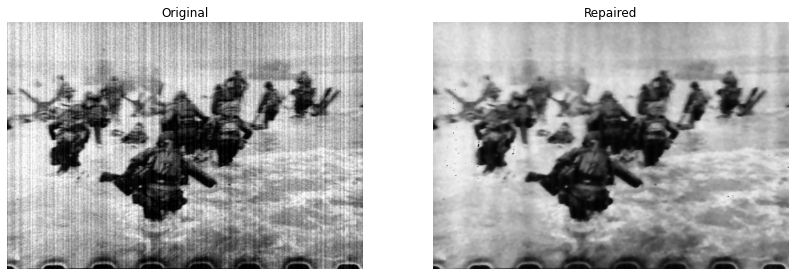

In [207]:
img = images[0]
magnitudes = []
filtered_show = []
points = []

channels = [img[:, :, 0], img[:, :, 1], img[:, :, 2]]
magnitude_spectrum, mag = fourier_transform(channels[0])
select_noises(magnitude_spectrum, 'select', points)
    
for channel in channels:
    filtered = bandpass_filtering(mag, points)
    backed_img = inverse_fourier_transform(filtered)
    filtered_to_show = bandpass_filtering(magnitude_spectrum, points)
    magnitudes.append(backed_img)
    filtered_show.append(filtered_to_show)
    
plotter(filtered_show, ['ch1', 'ch2', 'ch3'], subplots=(1, 3), gray=True)

merge = cv2.merge([magnitudes[0], magnitudes[1], magnitudes[2]]).astype(np.uint8)
denoised_image = denoise_tv_chambolle(merge)
plotter([new_img, denoised_image], names=['Original', 'Repaired'], subplots=(1, 2))

### Image 2.


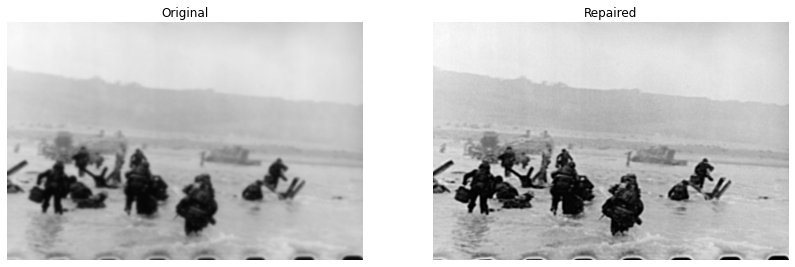

In [271]:
noisy_image = images[1]
kernel = np.array([[-1, -2, -1],
                   [-2, 13, -2],
                   [-1, -2, -1]])
sharped_image = cv2.filter2D(src=noisy_image, ddepth=-1, kernel=kernel)
plotter([noisy_image, sharped_image], ['Original', 'Repaired'], subplots=(1, 2), gray=True)

### Image 3.

In [240]:
def golden_denoiser(noisy_image):
    denoised_image = normalizer(denoise_tv_chambolle(noisy_image))
    denoised_image = cv2.fastNlMeansDenoising(denoised_image, h=5, templateWindowSize=11, searchWindowSize=11)
    plotter([noisy_image, denoised_image], ['Original', 'Repaired'], subplots=(1, 2), gray=True)

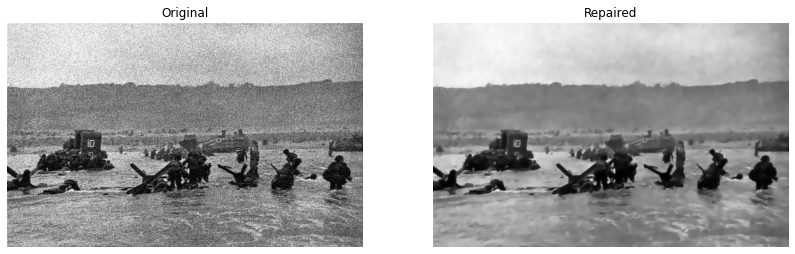

In [241]:
noisy_image = images[2]
golden_denoiser(noisy_image)

### Image 4.

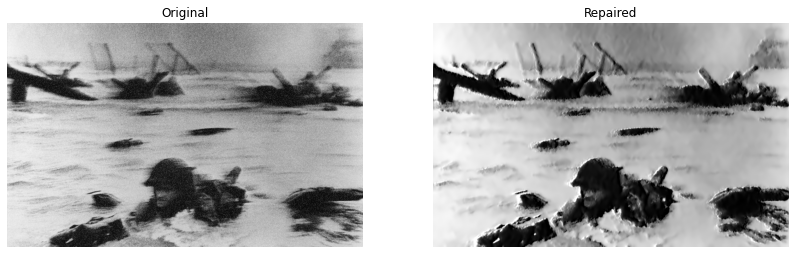

In [306]:
noisy_image = images[3]
denoised_image = normalizer(denoise_tv_chambolle(noisy_image))
kernel = np.array([[1, 0, -1],
                   [2, 1, -2],
                   [1, 0, -1]])
sharped_image = cv2.filter2D(src=denoised_image, ddepth=-1, kernel=kernel)
sharped_image = cv2.fastNlMeansDenoising(sharped_image, h=5, templateWindowSize=11, searchWindowSize=11)
plotter([noisy_image, sharped_image], ['Original', 'Repaired'], subplots=(1, 2), gray=True)

### Image 5.

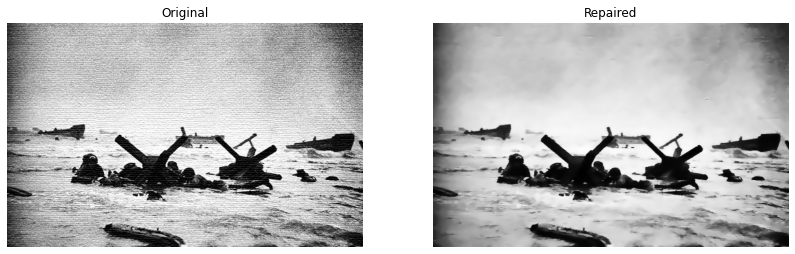

In [242]:
noisy_image = images[4]
golden_denoiser(noisy_image)

### Image 6.

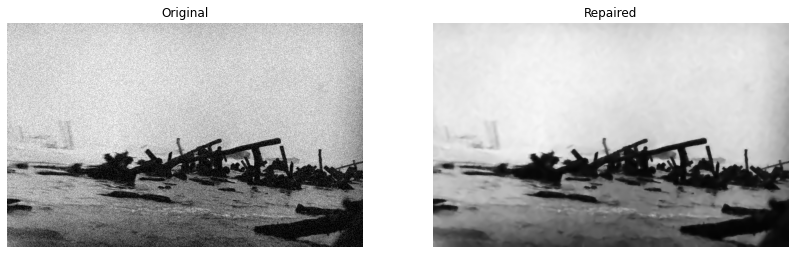

In [243]:
noisy_image = images[5]
golden_denoiser(noisy_image)

### Finito